### О задании

Абстрактная задача кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('german_credit.csv')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [4]:
data.shape

(1000, 21)

Описание данных. Разделение признаков на количественные, бинарные, порядковые и категориальные.

In [5]:
data.isna().sum(axis=0)

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [47]:
for i in data.columns:
    print(i + '\n')
    print(data[i].value_counts())
    print('\n')

status

... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: status, dtype: int64


duration

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
22      2
16      2
54      2
26      1
40      1
47      1
5       1
72      1
Name: duration, dtype: int64


credit_history

no credits taken/all credits paid back duly    530
all credits at this bank paid back duly        293
existing credits paid back duly till now        88
critical account/other credits elsewhere        49
delay in paying off in the past                 40
Name: credit_history, dtype: int64


purpose

furniture/equipment    280
others                 234
car (used)           

In [134]:
binary = ['people_liable','telephone', 'foreign_worker', 'credit_risk']
poryadok = ['employment_duration', 'installment_rate', 'present_residence', 'number_credits']
numbers = ['age', 'amount', 'duration']
category = ['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex', 'other_debtors', 
            'property', 'other_installment_plans', 'housing', 'job']
# вопрос с savings, куда его относить, но из-за того что там те, у кого нет сбер счета смешаны с теми у 
#кого он неизвестен, то отнесем это в категориальную переменную.

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [49]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [50]:
import numpy as np
print('процент клиентов моложе 30 лет, которые снимают жилье')
len(np.where((data['age']<30)&(data['housing']=='rent'))[0])/len(np.where(data['age']<30)[0])

процент клиентов моложе 30 лет, которые снимают жилье


0.6666666666666666

In [51]:
print('процент клиентов старше 40 лет, которые снимают жилье')
len(np.where((data['age']>40)&(data['housing']=='rent'))[0])/len(np.where(data['age']>40)[0])

процент клиентов старше 40 лет, которые снимают жилье


0.6801470588235294

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [55]:
new_data = pd.DataFrame(data.groupby('credit_risk')['status'].value_counts(sort=False))
new_data

status
credit_risk status                                            
bad         ... < 0 DM                                     105
            ... >= 200 DM / salary for at least 1 year      46
            0<= ... < 200 DM                                14
            no checking account                            135
good        ... < 0 DM                                     164
            ... >= 200 DM / salary for at least 1 year     348
            0<= ... < 200 DM                                49
            no checking account                            139

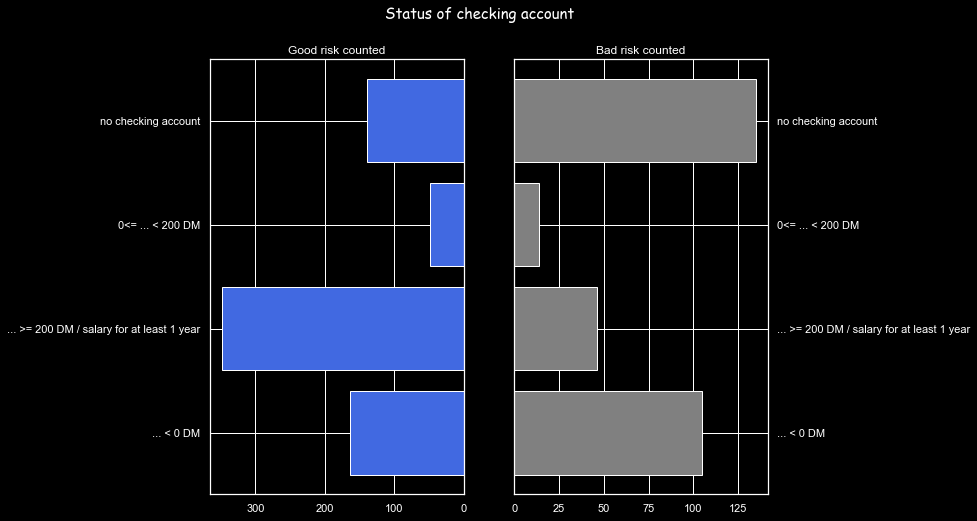

In [103]:
y = np.sort(data['status'].unique())
x_bad = new_data.loc['bad',:].to_numpy().flatten()  
x_good = new_data.loc['good',:].to_numpy().flatten() 

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 8))
plt.style.use('dark_background')
plt.figtext(.5,0.95,'Status of checking account', fontsize=15, ha='center', fontfamily = 'fantasy',fontstyle = 'oblique')
    
axes[0].barh(y, x_good, align='center', color='royalblue')
axes[0].set(title='Good risk counted')
axes[1].barh(y, x_bad, align='center', color='grey')
axes[1].set(title='Bad risk counted')
axes[1].tick_params(axis = 'y', labelright=True)
axes[0].set(yticks=y, yticklabels=y)
axes[0].invert_xaxis()


plt.show()

Как видно из гистограмм выше, у большинства клиентов с хорошим кредитным рейтингом статус следующий : "...>= 200 DM / salary for at least 1 year". Количество людей с этим статусом достигло отметки 348. Второе и третье места по частоте встречаемости у этих клиентов занимают соответственно статусы "...<0DM" и "no checking account". В то же время большинстов клиентов с плохим кредитным рейтингом представляют статус "no checking account" и "...<0DM". Вывод: клиенты со статусом "no checking account " равным образом распределены между клиентами с плохим и хорошим кредитными рейтингами. Однако ввиду перекоса выборки в виде соотношения клиентов bad risk : good risk = 3:7, можно понять, что это значимый индикатор

In [57]:
import seaborn as sns

Text(0.5, 1.0, 'Savings by credit risk')

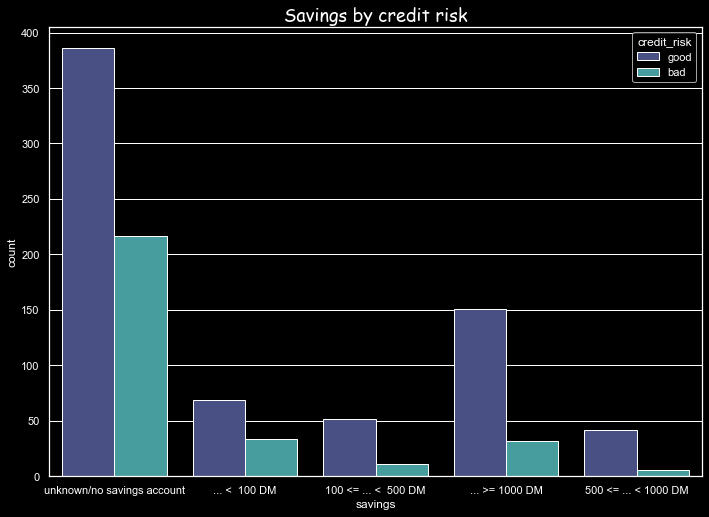

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('dark_background')
sns.countplot(x='savings',hue='credit_risk', data=data, palette='mako').set_title('Savings by credit risk', 
                                                            fontsize = 18,fontfamily = 'fantasy',fontstyle = 'oblique')

данная гистограмма мало что дает, так как и по good и по bad credit risk наибольшие доли составляют те, у кого либо нет сбер.счета, либо про него нет никакой информации. Отличительной особенностью является только то, что у клиентов с хорошим кредитным рейтингом количество счетов "...>=1000 DM", приближенно равное 150, значимо превышает тот же показатель у клиентов с плохим кредитным рейтингом (<50)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

Text(0.5, 0.98, 'Age distribution by credit risk')

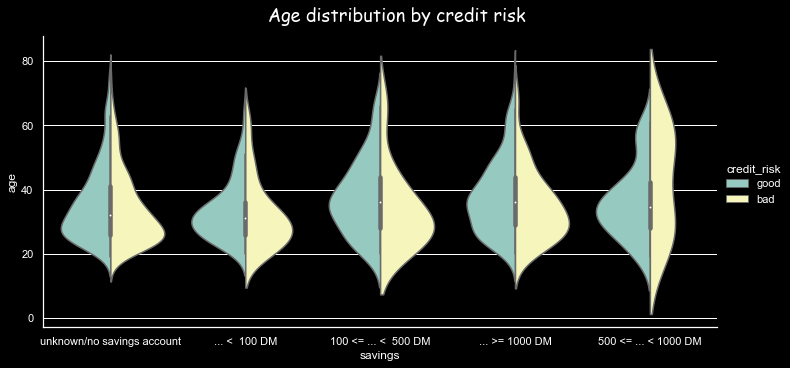

In [59]:
ax = sns.catplot(data=data, x="savings", y="age", hue="credit_risk", kind = 'violin', 
            split=True, palette = 'Set3', height=5, aspect=2)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Age distribution by credit risk', fontsize =18, fontfamily = 'fantasy',fontstyle = 'oblique')

Эта визуализация позволяет увидеть медиану по каждому из бинов, наибольшая медиана находится в '100<=...< 500 DM savings' 
Также можно сразу отметить, что самые разные формы из всех бинов – "500<=...<=1000 DM". При этом наибольшие вероятности (пиковые значения плотности распределения) практически одинаковые, кроме случаев с  "500<=...<=1000 DM" и '100<=...< 500 DM savings'. Из-за этого мы можем наблюдать смещение в сторону большего возраста среди клиентов с высоким кредитнвм рейтингом. Отдельное внимание заслуживает "500<=...<=1000 DM". В нем пиковые значения распределены в 2-х точках: около 60 и около 30.При этом  вероятность того, что человек в озраста около 60-ти лет, имеющий размер сберегательного счета "500<=...<=1000 DM", будет низкого кредитного рейтиенга примерно в 2 раза выше, чем вероятность того, что у него будет высокий кредитный рейтинг.

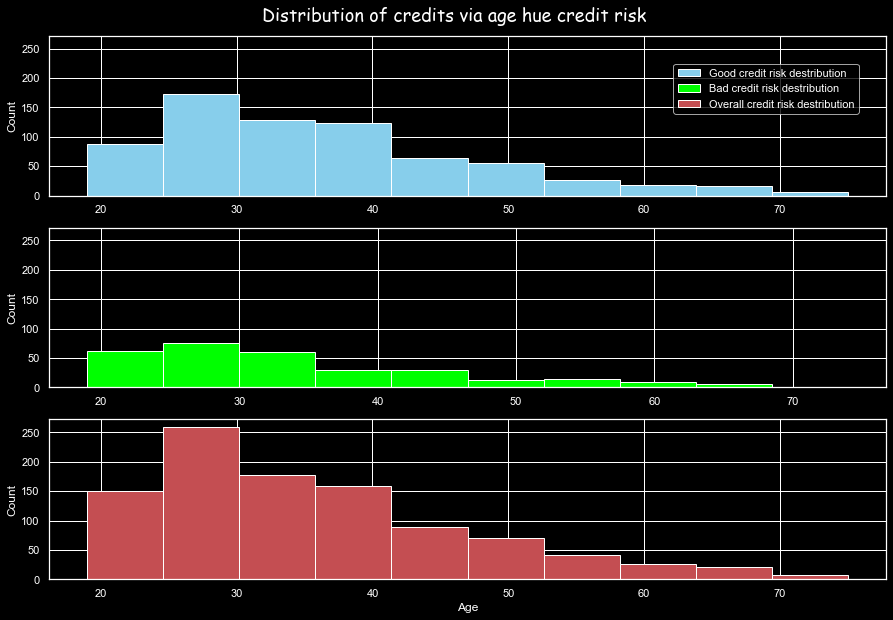

In [60]:
fig, ax = plt.subplots(3, sharey = True, figsize=(15, 10))
fig.suptitle('Distribution of credits via age hue credit risk', x = 0.5, y = 0.92, 
             fontsize = 18, fontfamily = 'fantasy',fontstyle = 'oblique')
ax[0].hist(data.query('credit_risk == "good"')['age'] , color="skyblue")
ax[1].hist(data.query('credit_risk == "bad"')['age'] , color="lime")
ax[2].hist(data['age'] , color="r")

for i in ax.flat:
    i.set(ylabel='Count')

plt.xlabel('Age')
fig.legend(['Good credit risk destribution', 'Bad credit risk destribution', 'Overall credit risk destribution'], 
           bbox_to_anchor=(0.8, 0.78))
plt.show()

Значения "count" для каждого из бинов для клиентов с высоким кредитным рейтингом выше чем для клиентов с низким кредитным рейтингом, поскольку выборка не взвешена. По общему графику распределения (там, где нет разделения по кредитному риску) видно, что распределение дублирует распределения по отдельно взятым кредитным рейтингам. Однако есть такие возрастные категории, где вес категории в частной гистограмме (разделенной по good/bad) выше, чем в общей. Например, для bad risk distribution категория 53-57 встречается чаще, чем категории 47-52, однако из-за того, что в  good risk distribution категория 47-52 имеет большее количество(>50), чем категория 53-58 (~25), то в overall мы видим, что категория 47-52 имеет болльший вес, чем категория 53-58. Аналогичным образом все объясняется для категории 24-30 в bad risk distribution

Text(0.5, 1.0, 'Density')

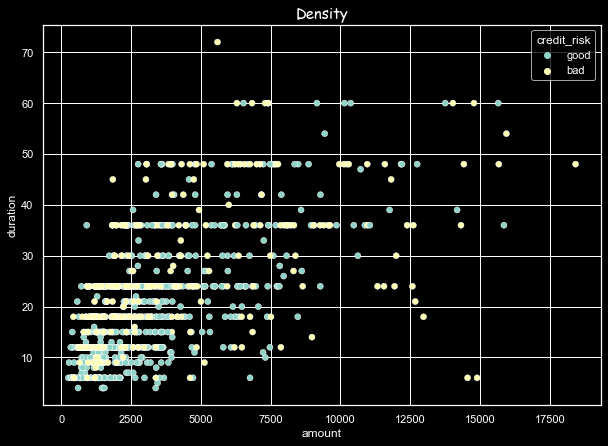

In [61]:
fig = plt.figure(figsize = (10, 7))

plt.style.use('dark_background')
sns.scatterplot(data = data, x='amount', y='duration', hue = 'credit_risk').set_title('Density',
                                                            fontsize = 15, fontfamily = 'fantasy',fontstyle = 'oblique')

Можно заметить, что если провести прямую y = x/187 (проходящая через точку (7500;40)), то тогда, цвет точек находящийся над этой прямой будет в большинстве своем соответствовать цвету, которым определяются клиенты с низким кредитным рейтингом, тогда как клиенты с высоким кредитным рейтингом будут находиться под этой прямой. Соответсвенно, в основном клиенты с низким кредитным рейтингом – те, кто берут небольшие суммы (это тенденция наблюдается почти для всех значений, если дюрация меньше 30 месяцев), то есть при одной и той же дюрации, например 24 месяца, клиенты с низким кредитным рейтингом в основном те, у кого сумма меньше 5000, а с высоким кредитным рейтингом – 5000-7600. Для 36 месяцев клиенты с хорошим кредитным рейтингом распределены по суммам в основном от 3000 и до 7500. Дальнейший разброс при увеличении дюрации описывается весьма сложно.

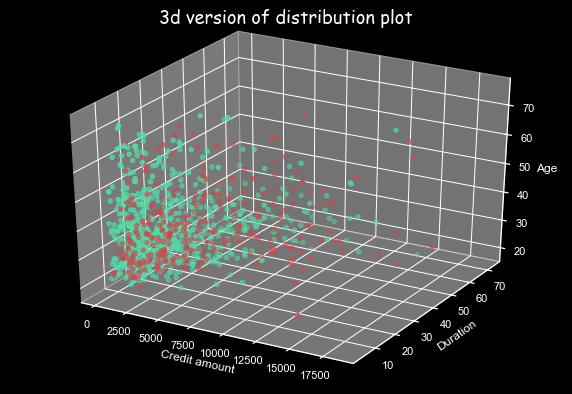

In [89]:
from mpl_toolkits import mplot3d

x = data['amount']
y = data['duration']
z = data['age']
 
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

plt.style.use('dark_background')
ax.scatter3D(x, y, z, c = data['credit_risk'].replace({'good': '#56dbaa', 'bad': 'r'}))
plt.title("3d version of distribution plot", fontsize = 18, pad =15, fontfamily = 'fantasy',fontstyle = 'oblique')

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age') 

plt.show()

In [80]:
# import plotly.express as px
# fig = px.scatter_3d(data, x='amount', y='duration', z='age')
# fig.show()

Клиентов с низким кредитным рейтингом не так много. Почти все, кто взял кредит на сумму больше 10000 и с дюрацией меньше 60, являются клиентами с низким кредитным рейтингом, если у них относительно низкий возраст.
Общая масса клиентов берет кредиты суммой меньше 2500 и дюрацией до 60 месяцев, однако при этом та часть, кто попадает в возрастную категорию до 30 разделена в равной пропорции между высоко- и низкорейтинговыми клиентами. В этом же блоке те, кто старше 30 имеют высокий кредитный рейтинг в ~ 80 % случаев.

In [181]:
for i in category:
    data = pd.concat([pd.get_dummies(data[i]), data.drop(i, axis = 1)], axis=1)

In [182]:
data['people_liable'] = data.apply(lambda row: 0 if row['people_liable'] =='0 to 2' else 1, axis=1)
data['telephone'] = data.apply(lambda row: 0 if row['telephone'] =='no' else 1, axis=1)
data['foreign_worker'] = data.apply(lambda row: 0 if row['foreign_worker'] =='no' else 1, axis=1)
data['credit_risk'] = data.apply(lambda row: 0 if row['credit_risk'] =='bad' else 1, axis=1)

In [183]:
# from sklearn.preprocessing import LabelEncoder
# label = LabelEncoder()
# for i in poryadok:
#     data[i+'_labeled'] = label.fit_transform(data[i].sort_values())
#     data.drop(columns = i, inplace = True)

In [184]:
data['employment_duration'] = data['employment_duration'].replace(['1 <= ... < 4 yrs', '>= 7 yrs', '4 <= ... < 7 yrs', '< 1 yr', 'unemployed'], [2, 4,3,1, 0])
data['installment_rate'] = data['installment_rate'].replace(['< 20', '25 <= ... < 35', '20 <= ... < 25', '>= 35'], [0, 2, 1, 3])
data['present_residence']=data['present_residence'].replace(['1 <= ... < 4 yrs', '>= 7 yrs', '4 <= ... < 7 yrs', '< 1 yr'], [1, 3,2,0])
data['number_credits'] =data['number_credits'].replace(['1', '3-Feb', '5-Apr', '>= 6'], [0, 1,2,3])

In [185]:
data

,manager/self-empl./highly qualif. employee,skilled employee/official,unemployed/unskilled - non-resident,unskilled - resident,for free,own,rent,bank,none,stores,...,amount,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0,1,0,0,1,0,0,0,1,0,...,1049,1,0,3,21,0,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0,...,2799,2,2,1,36,1,1,0,0,1
2,0,0,0,1,1,0,0,0,1,0,...,841,3,2,3,23,0,0,0,0,1
3,0,0,0,1,1,0,0,0,1,0,...,2122,2,1,1,39,1,1,0,1,1
4,0,0,0,1,0,0,1,1,0,0,...,2171,2,0,3,38,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,0,1,0,...,1987,2,2,3,21,0,1,0,0,0
996,0,1,0,0,0,0,1,0,1,0,...,2303,4,0,0,45,0,0,0,0,0
997,1,0,0,0,0,1,0,0,1,0,...,12680,4,0,3,30,0,0,1,0,0
998,1,0,0,0,0,0,1,0,1,0,...,6468,0,2,0,52,0,0,1,0,0


 Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1)

In [344]:
X = data.drop('credit_risk', 1)
X.columns

Index(['manager/self-empl./highly qualif. employee',
       'skilled employee/official', 'unemployed/unskilled - non-resident',
       'unskilled - resident', 'for free', 'own', 'rent', 'bank', 'none',
       'stores', 'building soc. savings agr./life insurance', 'car or other',
       'real estate', 'unknown / no property', 'co-applicant', 'guarantor',
       'none', 'female : non-single or male : single', 'female : single',
       'male : divorced/separated', 'male : married/widowed', '... <  100 DM',
       '... >= 1000 DM', '100 <= ... <  500 DM', '500 <= ... < 1000 DM',
       'unknown/no savings account', 'business', 'car (new)', 'car (used)',
       'domestic appliances', 'furniture/equipment', 'others',
       'radio/television', 'repairs', 'retraining', 'vacation',
       'all credits at this bank paid back duly',
       'critical account/other credits elsewhere',
       'delay in paying off in the past',
       'existing credits paid back duly till now',
       'no credits ta

In [631]:
def predict(X_test_trans: np.array) -> np.array:
    y_pt = []
    for a in X_test_trans:
        if ((a[50]+a[51]+a[48]+a[45]+1/2*a[44])>2.6):
            y_pt.append(0)
        else:
            y_pt.append(1)
    return np.array(y_pt)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)
norm = MinMaxScaler()
norm.fit(X_train)
X_train_trans = norm.transform(X_train)
X_test_trans = norm.transform(X_test)

accuracy_score(y_test, predict(X_test_trans))

0.724

In [629]:
y_pred_train = []
for a in X_train_trans:
    if ((a[50]+a[51]+a[48]+a[45]+1/2*a[44])>2.6):
        y_pred_train.append(0)
    else:
        y_pred_train.append(1)
y_pred_train =np.array(y_pred_train)
accuracy_score(y_train, y_pred_train)

0.6946666666666667

accuracy score так-то больше 0.6 получается, но результат не намного лучше константного ряда. Все-таки без регрессий довольно сложно понимать зависимости. Но из описанных выше графиков были замечены некоторые тенденции, которые и были включены в модель. Для более точной модели можно было подобрать веса, но так как этим муторно заниматься, безз встроенных методов, то оставим это на другой раз :)